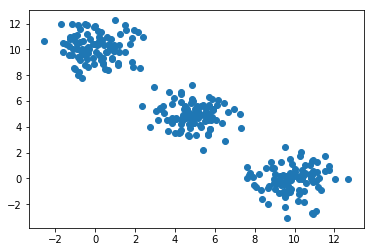

classified: 
[ True  True  True  True  True  True  True  True  True  True]

output probability: 
[[  9.98682678e-01   1.31731527e-03   2.58784910e-10]
 [  3.43130948e-03   9.69049275e-01   2.75194254e-02]
 [  9.69157398e-01   3.08425445e-02   5.09097688e-08]
 [  1.93514787e-02   9.70684528e-01   9.96400509e-03]
 [  4.12158085e-09   8.59103166e-03   9.91409004e-01]
 [  1.71545204e-02   9.76335824e-01   6.50969939e-03]
 [  2.30860678e-07   4.24577259e-02   9.57542002e-01]
 [  7.25345686e-08   8.87839682e-03   9.91121531e-01]
 [  8.43027297e-12   1.41838231e-04   9.99858141e-01]
 [  9.95894194e-01   4.10580169e-03   2.68717937e-09]]


In [23]:
# multiple output single layer perceptorons
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

np.random.seed(0)
tf.set_random_seed(0)

M=2
K=3
n=100
N=n*K

X1=np.random.randn(n, M)+np.array([0,10])
X2=np.random.randn(n, M)+np.array([5,5])
X3=np.random.randn(n, M)+np.array([10,0])
Y1=np.array([[1,0,0] for i in range(n)])
Y2=np.array([[0,1,0] for i in range(n)])
Y3=np.array([[0,0,1] for i in range(n)])


X=np.concatenate((X1,X2,X3),axis=0)
Y=np.concatenate((Y1,Y2,Y3),axis=0)

line = plt.figure()

plt.scatter (X[:,0], X[:,1])
plt.show()

# definition of perceptoron

W=tf.Variable(tf.zeros([M,K]))
b=tf.Variable(tf.zeros([K]))

x=tf.placeholder(tf.float32,shape=[None,M])
t=tf.placeholder(tf.float32,shape=[None,K])
y=tf.nn.softmax(tf.matmul(x,W)+b)

cross_entropy=tf.reduce_mean(-tf.reduce_sum(t*tf.log(y),axis=1))
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(t,1))

#cross_entropy = tf.reduce_mean(-tf.reduce_sum(t * tf.log(y), axis=1))
#train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)
#correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))

batch_size=50
n_batches=N

init=tf.global_variables_initializer()
sess=tf.Session()
sess.run(init)

for epoch in range(20):
    X_, Y_=shuffle(X,Y)
    
    for i in range(n_batches):
        start=i*batch_size
        end=start+batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end]
        })

X_, Y_=shuffle(X,Y)
classified=correct_prediction.eval(session=sess,feed_dict={
    x:X_[0:10],
    t:Y_[0:10]
})

prob=y.eval(session=sess, feed_dict={
    x: X_[0:10]
})

print('classified: ')
print(classified)
print()
print('output probability: ')
print(prob)
